In [1]:
import numpy as np
import h5py

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import AutoMinorLocator
from matplotlib.colors import Normalize

import uncertainties
from uncertainties import ufloat
from uncertainties.umath import *
from uncertainties import unumpy as unp

import colors

# Set matplotlib font to resemble LaTeX's default font (Computer Modern)
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Computer Modern'
plt.rcParams['text.usetex'] = True

### Create color patterns

In [2]:
orange = ["#ffac00"]
darkorange = ["#c46e00"]
blue = ["#4173b3"]
green = ["#61a842"]
darkgreen = ["#2c853c"]
red = ["#e85c47"]
alpha = [0.5,0.4,0.3,0.2,0.1,0.0]
beta = [0.9,0.8,0.6,0.4,0.2,0.1]
for i,c in enumerate(alpha):
        orange.append(colors.get_alpha_hex(orange[0],beta[i]))
        darkorange.append(colors.get_alpha_hex(darkorange[0],beta[i]))
        blue.append(colors.get_alpha_hex(blue[0],beta[i]))
        green.append(colors.get_alpha_hex(green[0],beta[i]))
        darkgreen.append(colors.get_alpha_hex(darkgreen[0],beta[i]))
        red.append(colors.get_alpha_hex(red[0],beta[i]))

### Quarter Filling

In [3]:
# 1. File Imports
etgent_file = h5py.File("../data/processed_data/GS_EtgEnt_Lx8_Ly8_LA16_N32_beta50.0.jld", "r")
shannon_file = h5py.File("../data/processed_data/GS_H2_N32_Lx8_Ly8_LA16_beta18.0_L180.jld", "r")
Pq_file = h5py.File("../data/processed_data/GS_Pn_N32_Lx8_Ly8_LA16_beta18.0_L180.jld", "r")
Pq2_file = h5py.File("../data/processed_data/GS_Pn2_N32_Lx8_Ly8_LA16_beta18.0_L180.jld", "r")
Pn2expmS2_file = h5py.File("../data/processed_data/GS_Pn2expmS2_Lx8_Ly8_LA16.jld", "r")

# 2. Data Extraction
U = shannon_file['U'][:]
S2_avg_raw = etgent_file['S2_avg'][1:]
S2_err_raw = etgent_file['S2_err'][1:]
Hn2_avg_raw = shannon_file['Hn2_avg'][:]['re_']
Hn2_err_raw = shannon_file['Hn2_err'][:]['re_']
Hm2_avg_raw = shannon_file['Hm2_avg'][:]['re_']
Hm2_err_raw = shannon_file['Hm2_err'][:]['re_']

# 3. Data Manipulation
S2 = [ufloat(n, u) for n, u in zip(S2_avg_raw, S2_err_raw)]
Hn = [ufloat(n, u) for n, u in zip(Hn2_avg_raw, Hn2_err_raw)]
Hm = [ufloat(n, u) for n, u in zip(Hm2_avg_raw, Hm2_err_raw)]
S2_avg = [yi.n for yi in S2]
S2_err = [yi.s for yi in S2]
Hn_avg = [yi.n for yi in Hn]
Hn_err = [yi.s for yi in Hn]
Hm_avg = [yi.n for yi in Hm]
Hm_err = [yi.s for yi in Hm]

# Accessible EE
S2n_acc = [S2[n] - Hn[n] for n in range(8)]
S2m_acc = [S2[n] - Hm[n] for n in range(8)]
S2n_acc_avg = [yi.n for yi in S2n_acc]
S2n_acc_err = [yi.s for yi in S2n_acc]
S2m_acc_avg = [yi.n for yi in S2m_acc]
S2m_acc_err = [yi.s for yi in S2m_acc]

# Symmetry-resolved EE
# charge-resolved
# n_A = 8
Pn_8 = [ufloat(n, u) for n, u in zip(Pq_file['Pn_avg'][:, 24]['re_'], Pq_file['Pn_err'][:, 24]['re_'])]
Pn2_8 = [ufloat(n, u) for n, u in zip(Pq2_file['Pn2_avg'][:, 24]['re_'], Pq2_file['Pn2_err'][:, 24]['re_'])]
dSn_8 = [unp.log(Pn2_8[n] / Pn_8[n]**2) for n in range(8)]
dSn_8_avg = [unp.nominal_values(yi) for yi in dSn_8]
dSn_8_err = [unp.std_devs(yi) for yi in dSn_8]
# n_A = 9
Pn_9 = [ufloat(n, u) for n, u in zip(Pq_file['Pn_avg'][:, 23]['re_'], Pq_file['Pn_err'][:, 23]['re_'])]
Pn2_9 = [ufloat(n, u) for n, u in zip(Pq2_file['Pn2_avg'][:, 23]['re_'], Pq2_file['Pn2_err'][:, 23]['re_'])]
dSn_9 = [unp.log(Pn2_9[n] / Pn_9[n]**2) for n in range(8)]
dSn_9_avg = [unp.nominal_values(yi) for yi in dSn_9]
dSn_9_err = [unp.std_devs(yi) for yi in dSn_9]
# n_A = 10
Pn_10 = [ufloat(n, u) for n, u in zip(Pq_file['Pn_avg'][:, 22]['re_'], Pq_file['Pn_err'][:, 22]['re_'])]
Pn2_10 = [ufloat(n, u) for n, u in zip(Pq2_file['Pn2_avg'][:, 22]['re_'], Pq2_file['Pn2_err'][:, 22]['re_'])]
dSn_10 = [unp.log(Pn2_10[n] / Pn_10[n]**2) for n in range(8)]
dSn_10_avg = [unp.nominal_values(yi) for yi in dSn_10]
dSn_10_err = [unp.std_devs(yi) for yi in dSn_10]
# spin-resolved
Pm_0 = [ufloat(n, u) for n, u in zip(Pq_file['Pm_avg'][:, 16]['re_'], Pq_file['Pm_err'][:, 16]['re_'])]
Pm2_0 = [ufloat(n, u) for n, u in zip(Pq2_file['Pm2_avg'][:, 16]['re_'], Pq2_file['Pm2_err'][:, 16]['re_'])]
dSm_0 = [unp.log(Pm2_0[n] / Pm_0[n]**2) for n in range(8)]
dSm_0_avg = [unp.nominal_values(yi) for yi in dSm_0]
dSm_0_err = [unp.std_devs(yi) for yi in dSm_0]

# Weighted charge sector contribution
Pn2expmS2_N64 = np.log10(np.exp(Pn2expmS2_file['N32'][:]))

# 4. Cleanup
etgent_file.close()
shannon_file.close()
Pq_file.close()
Pq2_file.close()
Pn2expmS2_file.close()

C:\Users\tongs\AppData\Local\Temp\ipykernel_27600\1066163669.py:71: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


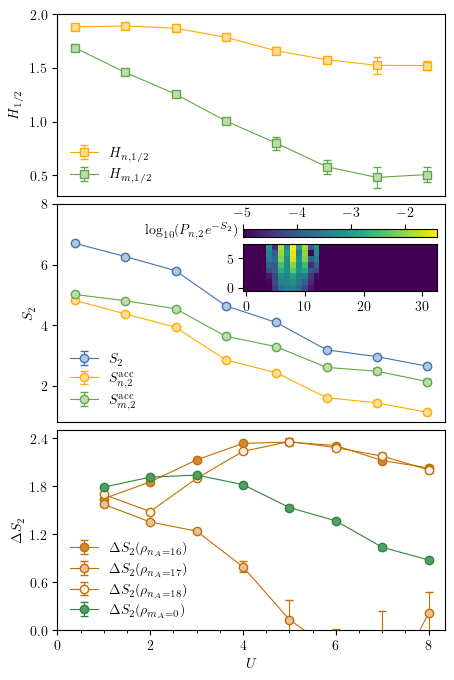

In [4]:
# Initialize the three subplots
def setup_axes(fig, gs):
    ax1 = fig.add_subplot(gs[0])
    ax2 = fig.add_subplot(gs[1])
    ax3 = fig.add_subplot(gs[2])
    return ax1, ax2, ax3

# Plot error bars on a given axis
def plot_errorbars(ax, x, y_avg, y_err, **kwargs):
    ax.errorbar(abs(x), y_avg, yerr=y_err, **kwargs)

# Set up the inset heatmap
def setup_inset(ax2, data, cmap, norm):
    axins = ax2.inset_axes([0.48, 0.46, 0.50, 0.50])
    im = axins.imshow(data, cmap=cmap, norm=norm)
    axins.invert_yaxis()
    return axins, im

# Create main figure and gridspec
fig = plt.figure(figsize=(5, 8))
gs = gridspec.GridSpec(3, 1, hspace=0.04, height_ratios=[1, 1.2, 1.1])
ax1, ax2, ax3 = setup_axes(fig, gs)

# Common plot parameters
plot_parameters = {
    'zorder': 3, 'linewidth': 0.8, 'elinewidth': 0.8,
    'fmt': '-o', 'markersize': 6, 'capsize': 3, 'capthick': 1
}

# Plotting on ax1
plot_parameters['fmt'] = '-s'
plot_errorbars(ax1, U, Hn_avg, Hn_err, label=r'$H_{n, 1/2}$', color=orange[0], markerfacecolor=orange[4], **plot_parameters)
plot_errorbars(ax1, U, Hm_avg, Hm_err, label=r'$H_{m, 1/2}$', color=green[0], markerfacecolor=green[4], **plot_parameters)
ax1.set_ylabel(r'$H_{1/2}$')
ax1.set_xticks([])
ax1.set_yticks([0.5, 1.0, 1.5, 2.0])
ax1.legend(frameon=False, ncol=1, loc='lower left', bbox_to_anchor=(0.0, 0.0))

# Plotting on ax2
plot_parameters['fmt'] = '-o'
plot_errorbars(ax2, U, S2_avg, S2_err, label=r'$S_2$', color=blue[0], markerfacecolor=blue[4], **plot_parameters)
plot_errorbars(ax2, U, S2n_acc_avg, S2n_acc_err, label=r'$S^{\mathrm{acc}}_{n,2}$', color=orange[0], markerfacecolor=orange[4], **plot_parameters)
plot_errorbars(ax2, U, S2m_acc_avg, S2m_acc_err, label=r'$S^{\mathrm{acc}}_{m,2}$', color=green[0], markerfacecolor=green[4], **plot_parameters)
ax2.set_xticks([])
ax2.set_yticks([2.0, 4.0, 6.0, 8.0])
ax2.set_ylabel(r'$S_2$')
ax2.legend(frameon=False, ncol=1, loc='lower left', bbox_to_anchor=(0.0, 0.0))

# Plotting on ax3
plot_errorbars(ax3, U, dSn_8_avg, dSn_8_err, label=r'$\Delta S_2(\rho_{n_A=16})$', color=darkorange[0], markerfacecolor=darkorange[2], **plot_parameters)
plot_errorbars(ax3, U, dSn_9_avg, dSn_9_err, label=r'$\Delta S_2(\rho_{n_A=17})$', color=darkorange[0], markerfacecolor=darkorange[4], **plot_parameters)
plot_errorbars(ax3, U, dSn_10_avg, dSn_10_err, label=r'$\Delta S_2(\rho_{n_A=18})$', color=darkorange[0], markerfacecolor=darkorange[6], **plot_parameters)
plot_errorbars(ax3, U, dSm_0_avg, dSm_0_err, label=r'$\Delta S_2(\rho_{m_A=0})$', color=darkgreen[0], markerfacecolor=darkgreen[2], **plot_parameters)
ax3.set_ylabel(r'$\Delta S_2$')
ax3.set_xticks([0.0, 2.0, 4.0, 6.0, 8.0])
ax3.set_yticks([0.0, 0.6, 1.2, 1.8, 2.4])
ax3.set_ylim([0, 2.5])
ax3.legend(frameon=False, ncol=1, loc='lower left', bbox_to_anchor=(0.00, 0.00))

# Set up inset
axins, im = setup_inset(ax2, Pn2expmS2_N64, "viridis", Normalize(vmin=-5))
cbar_ax = fig.add_axes([axins.get_position().x0, axins.get_position().y1 - 0.03, axins.get_position().width, 0.01])
cbar = fig.colorbar(im, cax=cbar_ax, orientation="horizontal", ticklocation="top")
cbar.ax.set_aspect('auto')
ax2.annotate(r'$\log_{10}(P_{n,2}e^{-S_2})$', xy=(2.4, 7.0), fontsize=10)

# Adjusting x-axis for bottom-most plot
ax3.set_xlabel(r'$U$')
ax3.xaxis.set_minor_locator(AutoMinorLocator())

plt.tight_layout()
plt.show()

In [5]:
fig.savefig("../figures/GS_EtgEnt_Lx8Ly8_LA8mul2_N32.pdf")
fig.savefig("../figures/GS_EtgEnt_Lx8Ly8_LA8mul2_N32.svg")

### Half Filling

In [6]:
# 1. File Imports
etgent_file = h5py.File("../data/processed_data/GS_EtgEnt_Lx8_Ly8_LA16_N64_beta50.0.jld", "r")
shannon_file = h5py.File("../data/processed_data/GS_H2_N64_Lx8_Ly8_LA16_beta18.0_L180.jld", "r")
Pq_file = h5py.File("../data/processed_data/GS_Pn_N64_Lx8_Ly8_LA16_beta18.0_L180.jld", "r")
Pq2_file = h5py.File("../data/processed_data/GS_Pn2_N64_Lx8_Ly8_LA16_beta18.0_L180.jld", "r")
Pn2expmS2_file = h5py.File("../data/processed_data/GS_Pn2expmS2_Lx8_Ly8_LA16.jld", "r")

# 2. Data Extraction
U = shannon_file['U'][:]
S2_avg_raw = etgent_file['S2_avg'][:]
S2_err_raw = etgent_file['S2_err'][:]
Hn2_avg_raw = shannon_file['Hn2_avg'][:]['re_']
Hn2_err_raw = shannon_file['Hn2_err'][:]['re_']
Hm2_avg_raw = shannon_file['Hm2_avg'][:]['re_']
Hm2_err_raw = shannon_file['Hm2_err'][:]['re_']

# 3. Data Manipulation
S2 = [ufloat(n, u) for n, u in zip(S2_avg_raw, S2_err_raw)]
Hn = [ufloat(n, u) for n, u in zip(Hn2_avg_raw, Hn2_err_raw)]
Hm = [ufloat(n, u) for n, u in zip(Hm2_avg_raw, Hm2_err_raw)]
S2_avg = [yi.n for yi in S2]
S2_err = [yi.s for yi in S2]
Hn_avg = [yi.n for yi in Hn]
Hn_err = [yi.s for yi in Hn]
Hm_avg = [yi.n for yi in Hm]
Hm_err = [yi.s for yi in Hm]

# Accessible EE
S2n_acc = [S2[n] - Hn[n] for n in range(8)]
S2m_acc = [S2[n] - Hm[n] for n in range(8)]
S2n_acc_avg = [yi.n for yi in S2n_acc]
S2n_acc_err = [yi.s for yi in S2n_acc]
S2m_acc_avg = [yi.n for yi in S2m_acc]
S2m_acc_err = [yi.s for yi in S2m_acc]

# Symmetry-resolved EE
# charge-resolved
# n_A = 8
Pn_8 = [ufloat(n, u) for n, u in zip(Pq_file['Pn_avg'][:, 16]['re_'], Pq_file['Pn_err'][:, 16]['re_'])]
Pn2_8 = [ufloat(n, u) for n, u in zip(Pq2_file['Pn2_avg'][:, 16]['re_'], Pq2_file['Pn2_err'][:, 16]['re_'])]
dSn_8 = [unp.log(Pn2_8[n] / Pn_8[n]**2) for n in range(8)]
dSn_8_avg = [unp.nominal_values(yi) for yi in dSn_8]
dSn_8_err = [unp.std_devs(yi) for yi in dSn_8]
# n_A = 9
Pn_9 = [ufloat(n, u) for n, u in zip(Pq_file['Pn_avg'][:, 15]['re_'], Pq_file['Pn_err'][:, 15]['re_'])]
Pn2_9 = [ufloat(n, u) for n, u in zip(Pq2_file['Pn2_avg'][:, 15]['re_'], Pq2_file['Pn2_err'][:, 15]['re_'])]
dSn_9 = [unp.log(Pn2_9[n] / Pn_9[n]**2) for n in range(8)]
dSn_9_avg = [unp.nominal_values(yi) for yi in dSn_9]
dSn_9_err = [unp.std_devs(yi) for yi in dSn_9]
# n_A = 10
Pn_10 = [ufloat(n, u) for n, u in zip(Pq_file['Pn_avg'][:, 14]['re_'], Pq_file['Pn_err'][:, 14]['re_'])]
Pn2_10 = [ufloat(n, u) for n, u in zip(Pq2_file['Pn2_avg'][:, 14]['re_'], Pq2_file['Pn2_err'][:, 14]['re_'])]
dSn_10 = [unp.log(Pn2_10[n] / Pn_10[n]**2) for n in range(8)]
dSn_10_avg = [unp.nominal_values(yi) for yi in dSn_10]
dSn_10_err = [unp.std_devs(yi) for yi in dSn_10]
# spin-resolved
Pm_0 = [ufloat(n, u) for n, u in zip(Pq_file['Pm_avg'][:, 16]['re_'], Pq_file['Pm_err'][:, 16]['re_'])]
Pm2_0 = [ufloat(n, u) for n, u in zip(Pq2_file['Pm2_avg'][:, 16]['re_'], Pq2_file['Pm2_err'][:, 16]['re_'])]
dSm_0 = [unp.log(Pm2_0[n] / Pm_0[n]**2) for n in range(8)]
dSm_0_avg = [unp.nominal_values(yi) for yi in dSm_0]
dSm_0_err = [unp.std_devs(yi) for yi in dSm_0]

# Weighted charge sector contribution
Pn2expmS2_N64 = np.log10(np.exp(Pn2expmS2_file['N64'][:]))

# 4. Cleanup
etgent_file.close()
shannon_file.close()
Pq_file.close()
Pq2_file.close()
Pn2expmS2_file.close()

C:\Users\tongs\AppData\Local\Temp\ipykernel_27600\4117469998.py:71: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


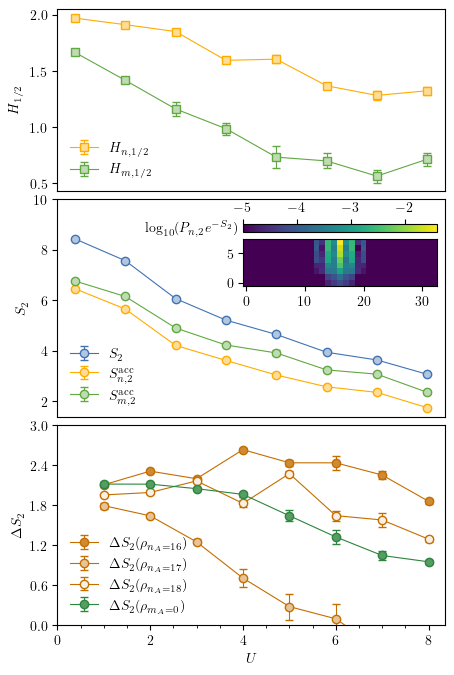

In [7]:
# Initialize the three subplots
def setup_axes(fig, gs):
    ax1 = fig.add_subplot(gs[0])
    ax2 = fig.add_subplot(gs[1])
    ax3 = fig.add_subplot(gs[2])
    return ax1, ax2, ax3

# Plot error bars on a given axis
def plot_errorbars(ax, x, y_avg, y_err, **kwargs):
    ax.errorbar(abs(x), y_avg, yerr=y_err, **kwargs)

# Set up the inset heatmap
def setup_inset(ax2, data, cmap, norm):
    axins = ax2.inset_axes([0.48, 0.46, 0.50, 0.50])
    im = axins.imshow(data, cmap=cmap, norm=norm)
    axins.invert_yaxis()
    return axins, im

# Create main figure and gridspec
fig = plt.figure(figsize=(5, 8))
gs = gridspec.GridSpec(3, 1, hspace=0.04, height_ratios=[1, 1.2, 1.1])
ax1, ax2, ax3 = setup_axes(fig, gs)

# Common plot parameters
plot_parameters = {
    'zorder': 3, 'linewidth': 0.8, 'elinewidth': 0.8,
    'fmt': '-o', 'markersize': 6, 'capsize': 3, 'capthick': 1
}

# Plotting on ax1
plot_parameters['fmt'] = '-s'
plot_errorbars(ax1, U, Hn_avg, Hn_err, label=r'$H_{n, 1/2}$', color=orange[0], markerfacecolor=orange[4], **plot_parameters)
plot_errorbars(ax1, U, Hm_avg, Hm_err, label=r'$H_{m, 1/2}$', color=green[0], markerfacecolor=green[4], **plot_parameters)
ax1.set_ylabel(r'$H_{1/2}$')
ax1.set_xticks([])
ax1.set_yticks([0.5, 1.0, 1.5, 2.0])
ax1.legend(frameon=False, ncol=1, loc='lower left', bbox_to_anchor=(0.0, 0.0))

# Plotting on ax2
plot_parameters['fmt'] = '-o'
plot_errorbars(ax2, U, S2_avg, S2_err, label=r'$S_2$', color=blue[0], markerfacecolor=blue[4], **plot_parameters)
plot_errorbars(ax2, U, S2n_acc_avg, S2n_acc_err, label=r'$S^{\mathrm{acc}}_{n,2}$', color=orange[0], markerfacecolor=orange[4], **plot_parameters)
plot_errorbars(ax2, U, S2m_acc_avg, S2m_acc_err, label=r'$S^{\mathrm{acc}}_{m,2}$', color=green[0], markerfacecolor=green[4], **plot_parameters)
ax2.set_xticks([])
ax2.set_yticks([2.0, 4.0, 6.0, 8.0, 10.0])
ax2.set_ylabel(r'$S_2$')
ax2.legend(frameon=False, ncol=1, loc='lower left', bbox_to_anchor=(0.0, 0.0))

# Plotting on ax3
plot_errorbars(ax3, U, dSn_8_avg, dSn_8_err, label=r'$\Delta S_2(\rho_{n_A=16})$', color=darkorange[0], markerfacecolor=darkorange[2], **plot_parameters)
plot_errorbars(ax3, U, dSn_9_avg, dSn_9_err, label=r'$\Delta S_2(\rho_{n_A=17})$', color=darkorange[0], markerfacecolor=darkorange[4], **plot_parameters)
plot_errorbars(ax3, U, dSn_10_avg, dSn_10_err, label=r'$\Delta S_2(\rho_{n_A=18})$', color=darkorange[0], markerfacecolor=darkorange[6], **plot_parameters)
plot_errorbars(ax3, U, dSm_0_avg, dSm_0_err, label=r'$\Delta S_2(\rho_{m_A=0})$', color=darkgreen[0], markerfacecolor=darkgreen[2], **plot_parameters)
ax3.set_ylabel(r'$\Delta S_2$')
ax3.set_xticks([0.0, 2.0, 4.0, 6.0, 8.0])
ax3.set_yticks([0.0, 0.6, 1.2, 1.8, 2.4, 3.0])
ax3.set_ylim([0, 3.0])
ax3.legend(frameon=False, ncol=1, loc='lower left', bbox_to_anchor=(0.00, 0.00))

# Set up inset
axins, im = setup_inset(ax2, Pn2expmS2_N64, "viridis", Normalize(vmin=-5))
cbar_ax = fig.add_axes([axins.get_position().x0, axins.get_position().y1 - 0.03, axins.get_position().width, 0.01])
cbar = fig.colorbar(im, cax=cbar_ax, orientation="horizontal", ticklocation="top")
cbar.ax.set_aspect('auto')
ax2.annotate(r'$\log_{10}(P_{n,2}e^{-S_2})$', xy=(2.4, 8.7), fontsize=10)

# Adjusting x-axis for bottom-most plot
ax3.set_xlabel(r'$U$')
ax3.xaxis.set_minor_locator(AutoMinorLocator())

plt.tight_layout()
plt.show()


In [8]:
fig.savefig("../figures/GS_EtgEnt_Lx8Ly8_LA8mul2_N64.pdf")
fig.savefig("../figures/GS_EtgEnt_Lx8Ly8_LA8mul2_N64.svg")